# Rottening Images

This notebook has the intention of analyzing and preprocessing an image dataset in order to be used later on a deep learning model.
As part of the preprocessing, the images will be "rotten" meaning their resolution and general quality will be decreased.

In [1]:
import cv2 as cv
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage.transform import resize

# Path to images
path_images = "/home/fraga/Documents/Escuela/Ingeniería de Software/Data/images/"

# List of all images' names
files = !ls '{path_images}'

print('Amount of images:', len(files))

Amount of images: 7380


## Checking the images

Let's open some images to take a look at them, check dimensions, channels, etc.

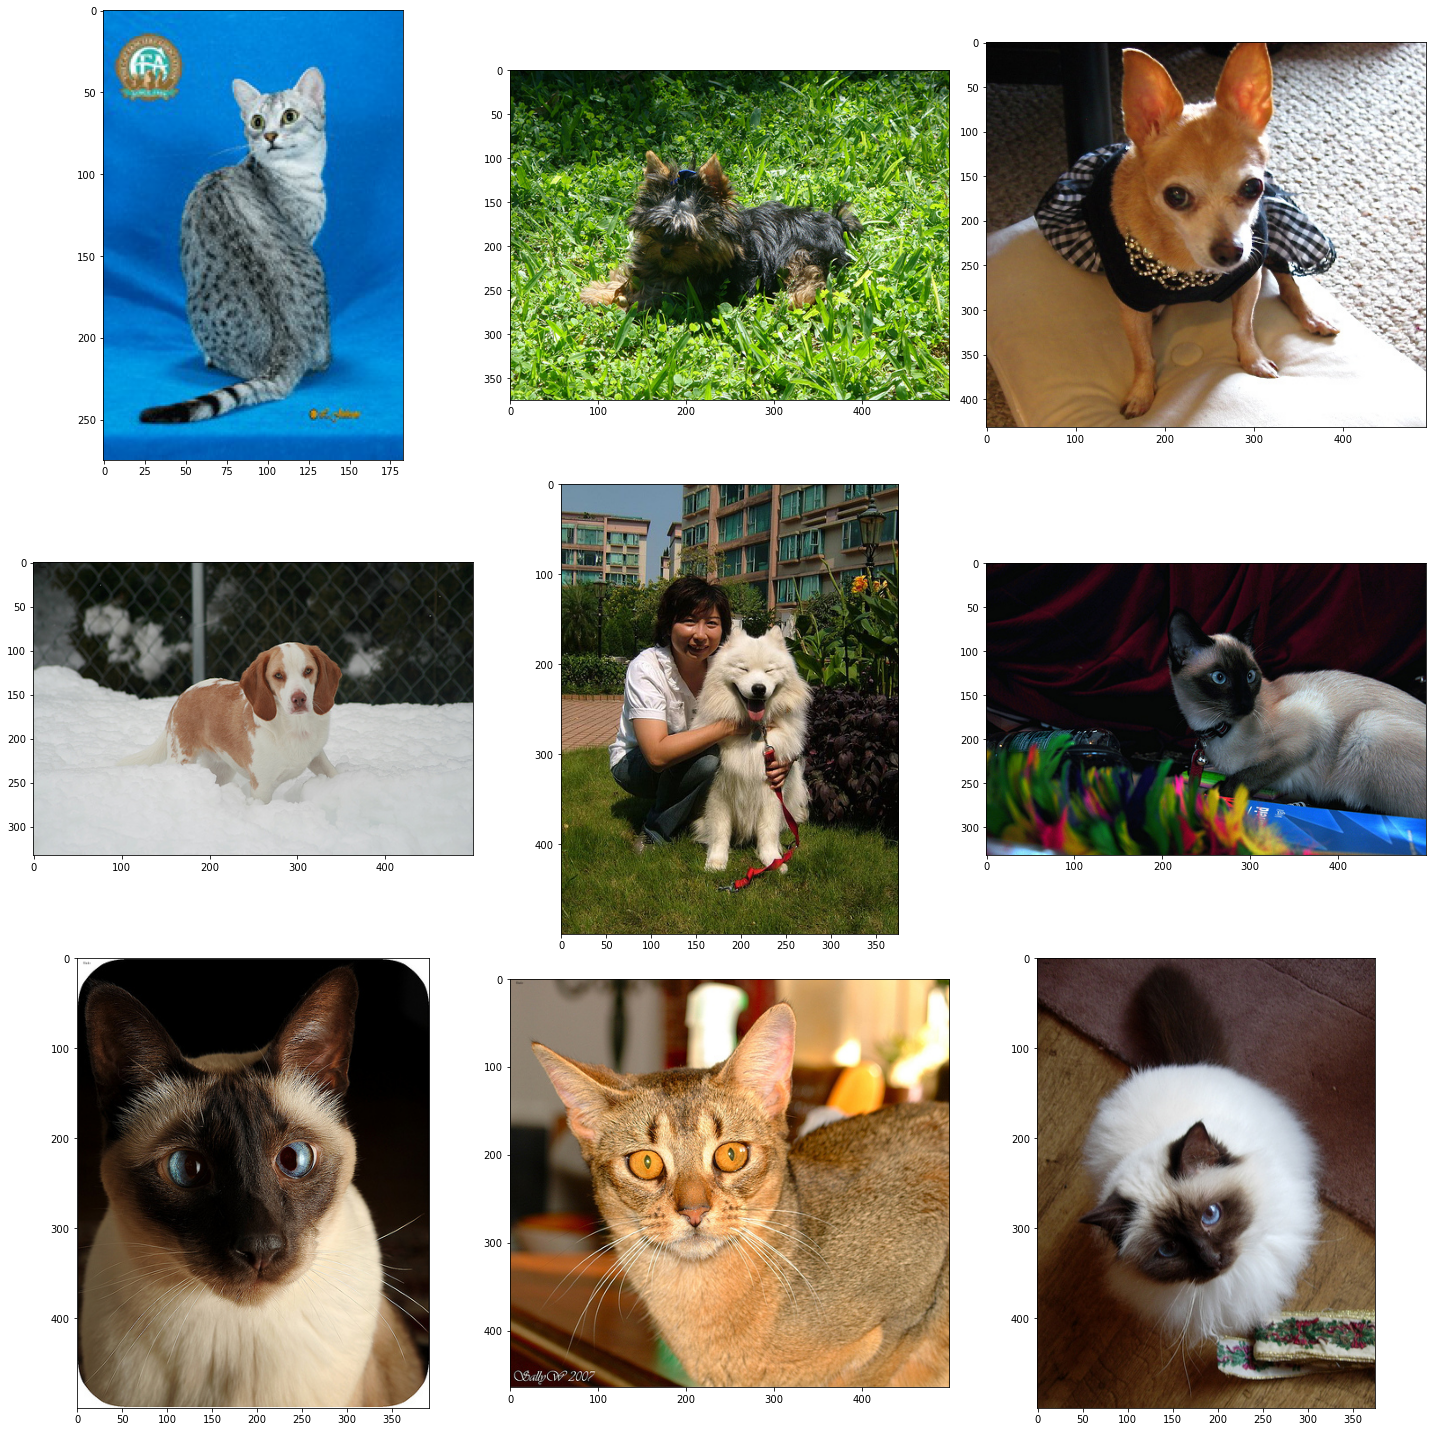

In [30]:
n_rows = 3
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize = (20, 20))

for i in range(n_rows):
    for j in range(n_cols):
        index = np.random.randint(len(files))
        
        ax[i][j].imshow(Image.open(path_images + files[index]))

plt.tight_layout()
plt.show()

### Dimensions of the images

In [3]:
dimensions = []

for i in range(len(files)):
    dimensions.append(np.asarray(Image.open(path_images + files[i])).shape)

len(set(dimensions))

1019

As we can see, images are not the same size at all, from the 7390 images there are 1019 different dimensions. But this is not an issue, in fact, it is expected. Nothing the `tensorflow` or `sklearn` packages can't solve.  
Let's now check the channels each image has, as this is very important information for later processes.

### Channels of the images

In [4]:
channels_dims = []
two = 0

for i in range(len(files)):
    n_channels = len(np.asarray(Image.open(path_images + files[i])).shape)
    if n_channels not in channels_dims:
        channels_dims.append(n_channels)

print("Number of channels in the dataset: ", set(channels_dims))

Number of channels in the dataset:  {3}


Ok, so all images have 3 channels, so there is not much else to do here.

## Starting the rottenning
Now let's start rotting, the goal of this section is to make the images seem the more than can be to a bad resolution image. I'm thinking about shrinking the images and expanding them to get bad looking edges, maybe trying some gaussian blur.

### Resizing

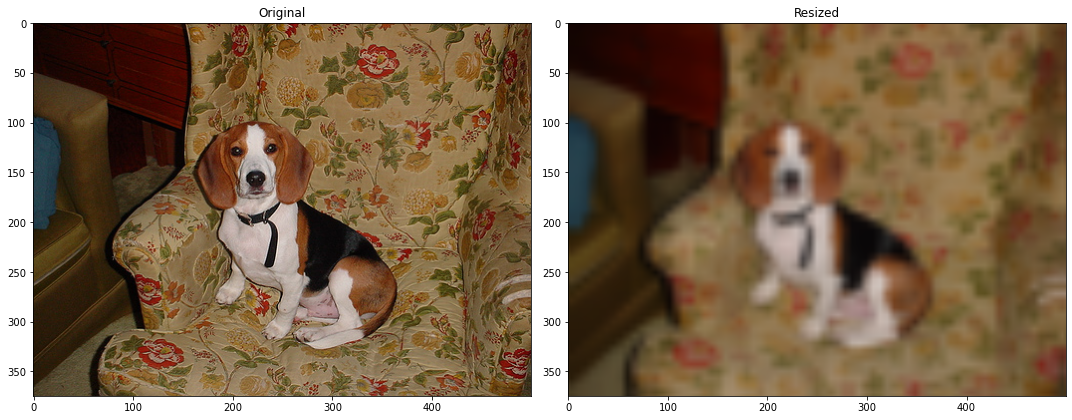

In [31]:
test = np.asarray(Image.open(path_images + files[np.random.randint(len(files))]))

image_resized = resize(test, (test.shape[0] // 7, test.shape[1] // 7), anti_aliasing = True)
image_resized = resize(image_resized, (test.shape[0], test.shape[1]))

fig, ax = plt.subplots(1, 2, figsize = (15, 15))

ax[0].imshow(test)
ax[0].set_title('Original')

ax[1].imshow(image_resized)
ax[1].set_title('Resized')

plt.tight_layout()
plt.show()

### Modifying contrast

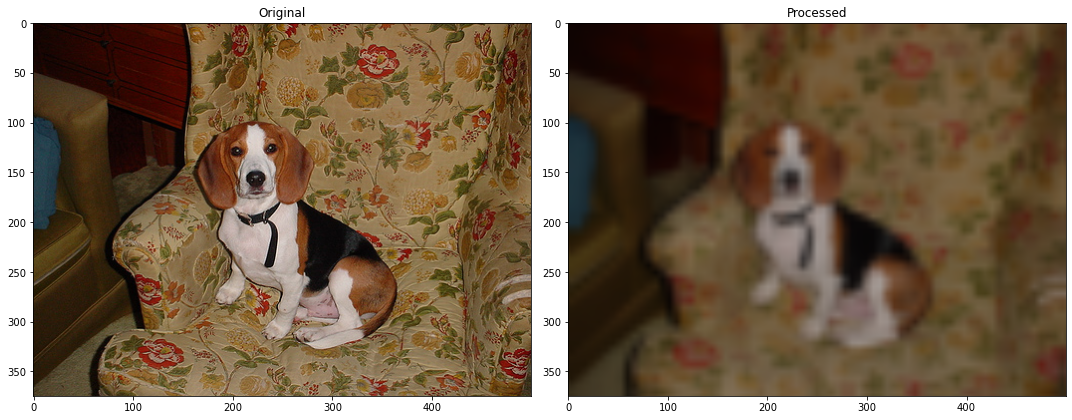

In [32]:
new_image = cv.convertScaleAbs(image_resized, alpha = 200)

fig, ax = plt.subplots(1, 2, figsize = (15, 15))

ax[0].imshow(test)
ax[0].set_title('Original')

ax[1].imshow(new_image)
ax[1].set_title('Processed')

plt.tight_layout()
plt.show()

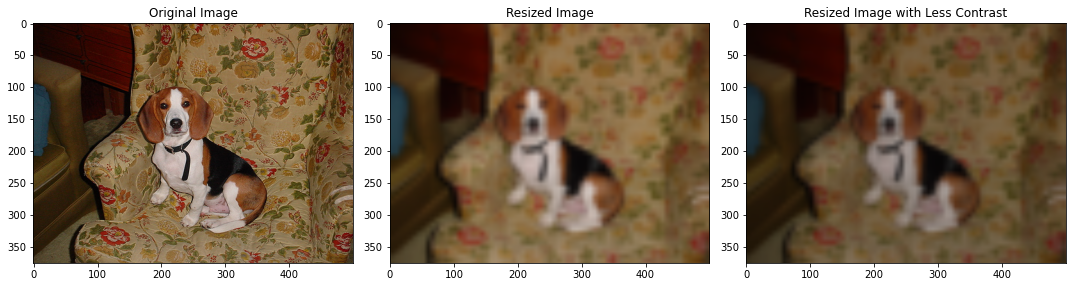

In [33]:
fig, ax = plt.subplots(1, 3, figsize = (15, 15))

ax[0].imshow(test)
ax[0].set_title('Original Image')

ax[1].imshow(image_resized)
ax[1].set_title('Resized Image')

ax[2].imshow(new_image)
ax[2].set_title('Resized Image with Less Contrast')

plt.tight_layout()
plt.show()

### Rottenning function

In [2]:
def rot(image, factor, alpha):
    rot_image = resize(image, (image.shape[0] // factor, image.shape[1] // factor),
                      anti_aliasing = True)
    
    rot_image = resize(rot_image, (image.shape[0], image.shape[1]))
    
    rot_image = cv.convertScaleAbs(rot_image, alpha = alpha)
    
    return rot_image

### Some examples of the rottenning

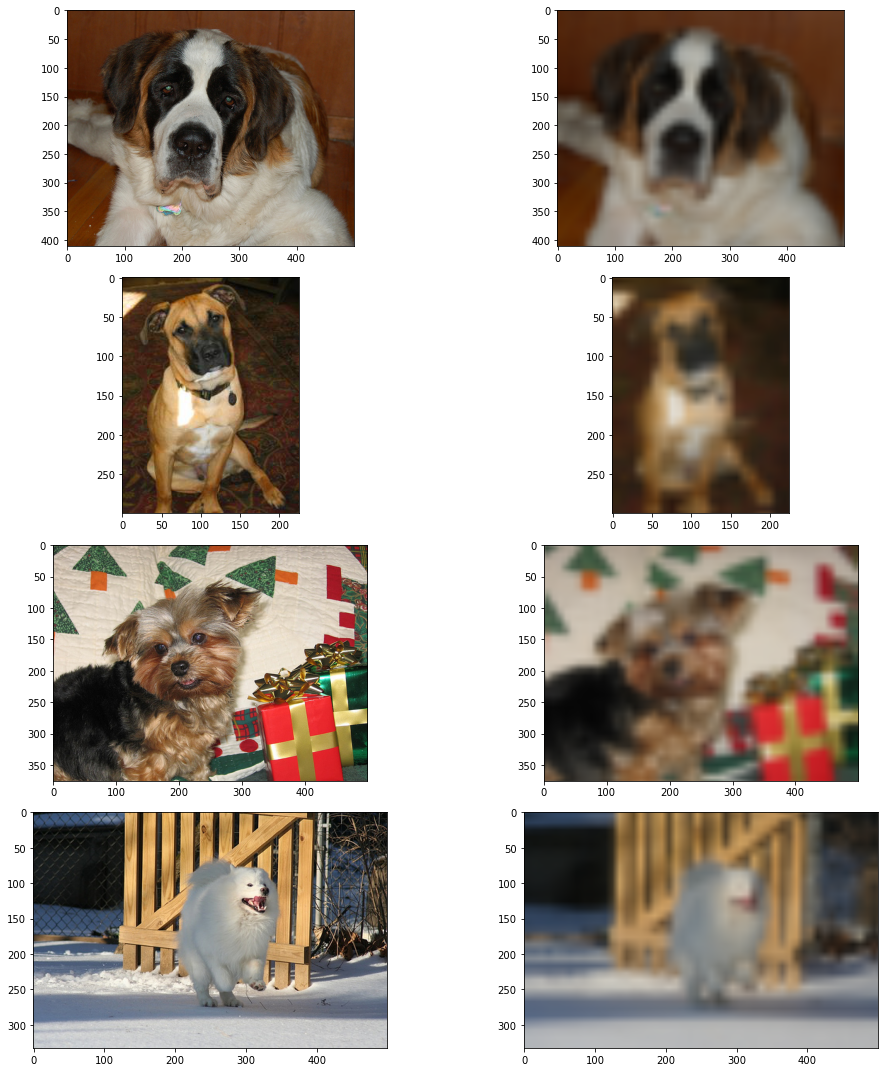

In [50]:
factor = 10
alpha = 230
n_rows = 4

fig, ax = plt.subplots(n_rows, 2, figsize = (15, 15))

for i in range(n_rows):
    index = np.random.randint(len(files))
    
    image = np.asarray(Image.open(path_images + files[index]))
    rot_test = rot(image, factor, alpha)
    
    ax[i][0].imshow(image)
    ax[i][1].imshow(rot_test)

plt.tight_layout()
plt.show()

## Applying the rottenning function to create the training dataset

In [61]:
def create_rotten_ds(path_images, files, train_path):

  for i in range(len(files)):
      a = Image.fromarray(rot(np.asarray(Image.open(path_images + files[i])), 10, 230))
      try:
        a.save(train_path + 'rotten' + files[i])
      
      except:
        print("Could not save: ", files[i])